# Setting

In [81]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import interpolate
from statsmodels.tsa.stattools import adfuller

# Lettura dataset

In [82]:
df_original = pd.read_csv("data/globaltemperatures.csv")
df = df_original.copy(deep=True)
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574
1,1750-02-01,3.083,3.702
2,1750-03-01,5.626,3.076
3,1750-04-01,8.490,2.451
4,1750-05-01,11.573,2.072


In [83]:
fig = px.line(df, x=df.dt, y="LandAverageTemperature", title='Livello mensile')
fig.show()

# Preprocessing

## Caratteristiche principali

In [84]:
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty
count,3180.000000,3180.000000
mean,8.374731,0.938468
std,4.381310,1.096440
min,-2.080000,0.034000
25%,4.312000,0.186750
50%,8.610500,0.392000
75%,12.548250,1.419250
max,19.021000,7.880000


In [85]:
df.shape

(3192, 3)

## Verifica duplicati

In [86]:
sum(df.duplicated())

0

## Verifica missing values

In [87]:
df.isna().sum()

# vedi progetto tiem series per sistemazione

dt                                    0
LandAverageTemperature               12
LandAverageTemperatureUncertainty    12
dtype: int64

In [88]:
df[df.isna().any(axis=1)]

# dunque i missing values si riferiscono ai primi anni della serie storica

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
10,1750-11-01,NaN,NaN
16,1751-05-01,NaN,NaN
18,1751-07-01,NaN,NaN
21,1751-10-01,NaN,NaN
22,1751-11-01,NaN,NaN
23,1751-12-01,NaN,NaN
25,1752-02-01,NaN,NaN
28,1752-05-01,NaN,NaN
29,1752-06-01,NaN,NaN
30,1752-07-01,NaN,NaN


## Correzione missing values

In [89]:
from scipy import interpolate

df = df.interpolate(option='time')

# verifica grafica bontà correzione
fig = px.line(df, x=df.dt, y="LandAverageTemperature", title='Livello mensile')
fig.show()

## Feature engineering

In [90]:
# sistemazione formato campo data

df['dt'] = pd.to_datetime(df['dt'], format='%Y/%m/%d')
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574
1,1750-02-01,3.083,3.702
2,1750-03-01,5.626,3.076
3,1750-04-01,8.490,2.451
4,1750-05-01,11.573,2.072
...,...,...,...
3187,2015-08-01,14.755,0.072
3188,2015-09-01,12.999,0.079
3189,2015-10-01,10.801,0.102
3190,2015-11-01,7.433,0.119


In [91]:
# aggiungere altre feature come mese

df['month'] = df['dt'].dt.month
df['year'] = df['dt'].dt.year
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,month,year
0,1750-01-01,3.034,3.574,1,1750
1,1750-02-01,3.083,3.702,2,1750
2,1750-03-01,5.626,3.076,3,1750
3,1750-04-01,8.490,2.451,4,1750
4,1750-05-01,11.573,2.072,5,1750
...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,8,2015
3188,2015-09-01,12.999,0.079,9,2015
3189,2015-10-01,10.801,0.102,10,2015
3190,2015-11-01,7.433,0.119,11,2015


In [49]:
df.set_index('dt', inplace=True)
# df = df[['LandAverageTemperature']]
# df

## Serie storica a diverse granularità

In [50]:
# livello mensile senza missing values

fig = px.line(df, x=df.index, y="LandAverageTemperature", title='Livello mensile')
fig.show()

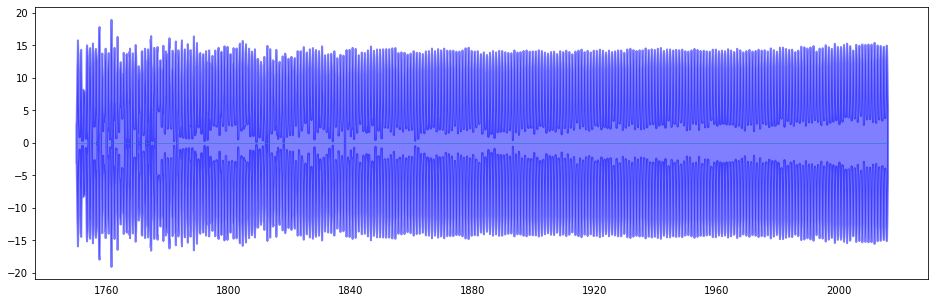

In [51]:
# grafico a specchio a livello mensile

import numpy as np

plt.figure(figsize=(16,5))
plt.fill_between(df.index, y1=df['LandAverageTemperature'], y2=-df['LandAverageTemperature'], alpha=0.5, linewidth=2, color='blue')
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

In [52]:
# livello annuale

df_year = df[['LandAverageTemperature']].resample("Y").sum()
fig = px.line(df_year, x=df_year.index, y="LandAverageTemperature", title='Livello annuale')
fig.show()

## Analisi distribuzione variabile di interesse

D:\Anaconda\envs\env_fisica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



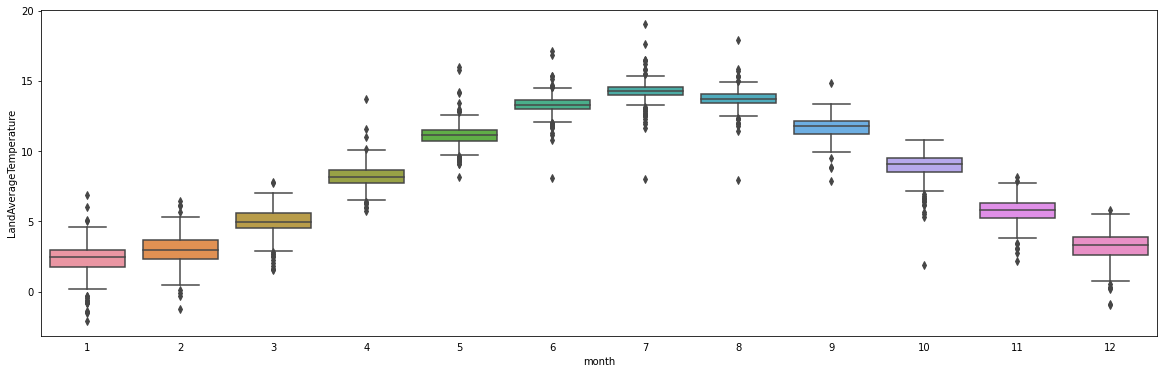

In [53]:
# a livello mensile

fig, ax = plt.subplots(figsize=(20, 6))

sns.boxplot(df['month'], df['LandAverageTemperature'])
ax.set_xlabel('month')
ax.set_ylabel('LandAverageTemperature')

plt.show()

# si nota già qui una stagionalità mensile

## Analisi autocorrelazione

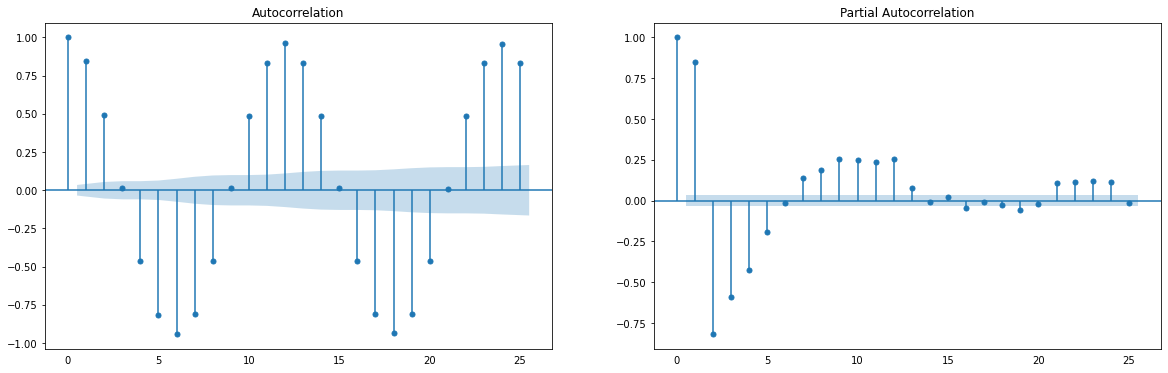

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(20,6))
plot_acf(df.LandAverageTemperature.tolist(), lags=25, ax=axes[0])
plot_pacf(df.LandAverageTemperature.tolist(), lags=25, ax=axes[1])
plt.show()

## Decomposizione

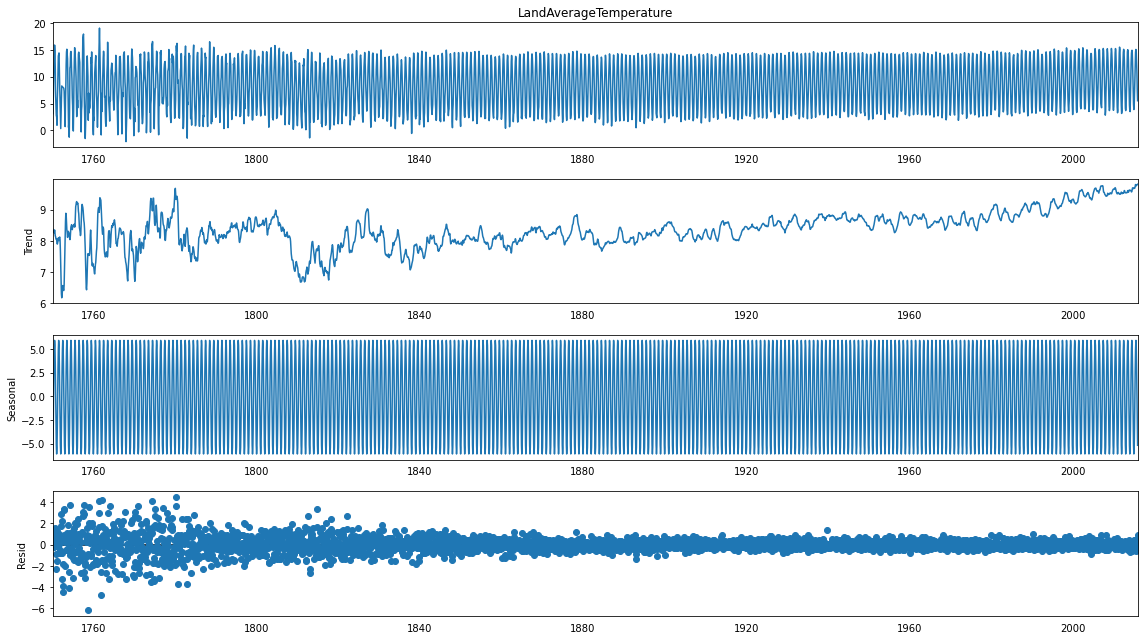

In [57]:
# decomposizione

df_test = df.ffill()

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition
result_add = seasonal_decompose(df_test['LandAverageTemperature'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (16, 9)})
result_add.plot()
plt.show()

In [35]:
# There is clearly an upward trend in the Earth's temperature over the last 150 years. But what if this increase is caused by warming only in underpopulated places like Antarcticaor Siberia? Let's examine such graphs for some cities!

### Analisi tendenza

<AxesSubplot:xlabel='dt'>

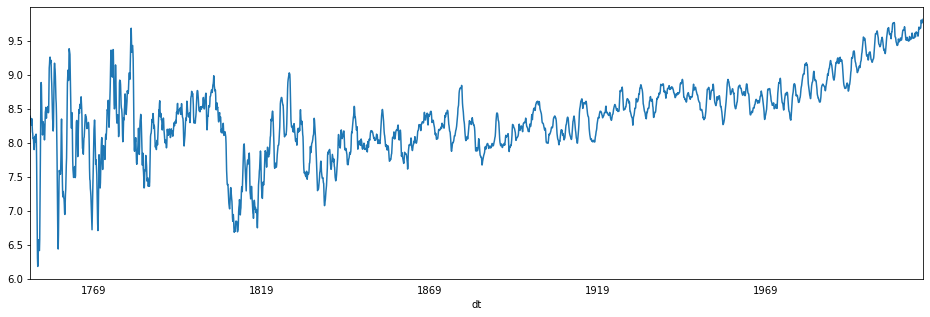

In [58]:
plt.figure(figsize=(16,5))
result_add.trend.plot(legend=False)

In [59]:
result_add.trend

dt
1750-01-01    8.387605
1750-02-01    8.360928
1750-03-01    8.334252
1750-04-01    8.307576
1750-05-01    8.280900
                ...   
2015-08-01    9.766115
2015-09-01    9.777700
2015-10-01    9.789285
2015-11-01    9.800871
2015-12-01    9.812456
Name: trend, Length: 3192, dtype: float64

### Analisi stagionalità

<AxesSubplot:xlabel='dt'>

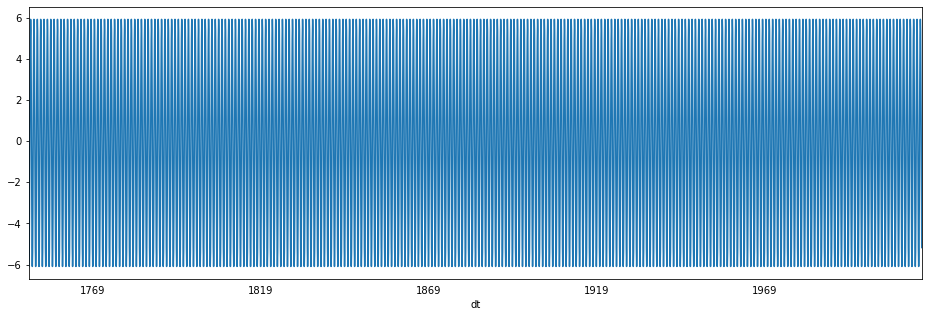

In [60]:
plt.figure(figsize=(16,5))
result_add.seasonal.plot(legend=False)

In [61]:
result_add.seasonal

dt
1750-01-01   -6.093454
1750-02-01   -5.406483
1750-03-01   -3.411714
1750-04-01   -0.120741
1750-05-01    2.769936
                ...   
2015-08-01    5.365940
2015-09-01    3.335971
2015-10-01    0.508751
2015-11-01   -2.636375
2015-12-01   -5.175941
Name: seasonal, Length: 3192, dtype: float64

# Regressione lineare del trend

In [62]:
# Per fare regressione lineare di una timeseries è conveniente trasformare l'indice (l'asse X) in un numero che indica il numero di periodi passati dal momento inziale.

In [63]:
from sklearn.linear_model import LinearRegression

## Preparazione dati

In [64]:
trend_df = pd.DataFrame()
trend_df['y'] = result_add.trend
trend_df = trend_df.reset_index()
trend_df['x'] = list(range(1,3193,1))
trend_df = trend_df[['x', 'y']]

In [65]:
trend_df

,x,y
0,1,8.387605
1,2,8.360928
2,3,8.334252
3,4,8.307576
4,5,8.280900
...,...,...
3187,3188,9.766115
3188,3189,9.777700
3189,3190,9.789285
3190,3191,9.800871


## Implementazione modello

In [66]:
model = LinearRegression()

In [67]:
x = trend_df['x'].values
y = trend_df['y'].values

In [68]:
x = x.reshape(3192, 1)
y = y.reshape(3192, 1)

In [69]:
model  = model.fit(x, y)

## Risultati

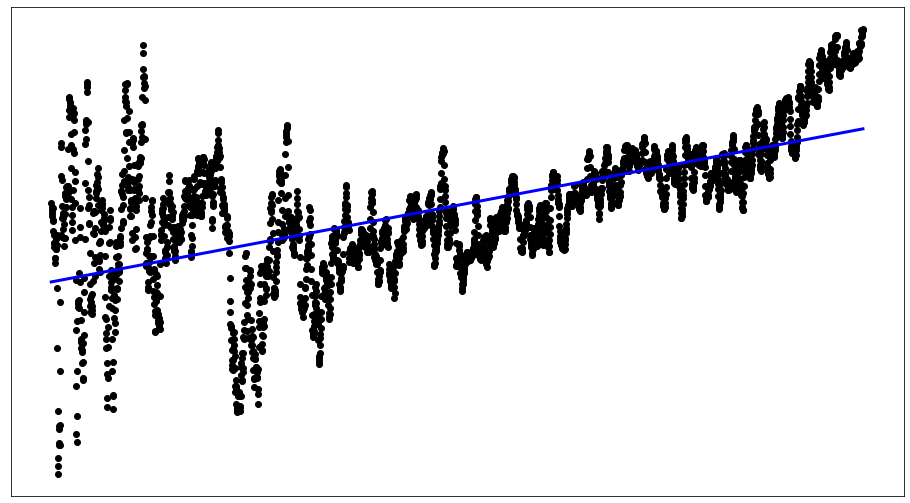

In [70]:
plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

# Previsioni con ARIMA

In [71]:
# autoarima
# !pip3 install pmdarima
import pmdarima as pm

## Preparazione dati

In [72]:
df_arima = df[['LandAverageTemperature']]
df_arima

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


## Verifica stazionarietà

In [77]:
result = adfuller(df_arima.LandAverageTemperature
)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# This data is not stationary. It has an upward trend and strong seasonality

# tutta via il test sembra dire che la serie è stazionaria

ADF Statistic: -4.036404
p-value: 0.001231
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [ ]:
# per completezza si prova a vedere l'effetto di eliminare trend e stagionalità dai dati

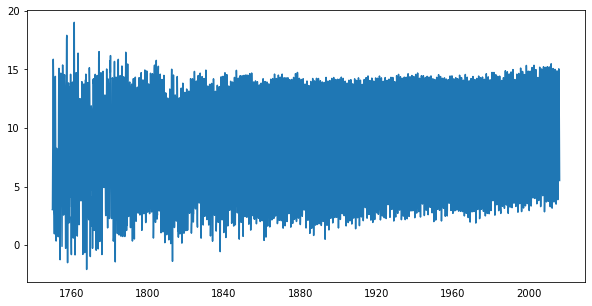

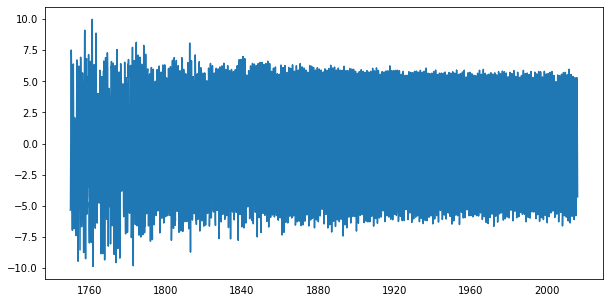

In [107]:
plt.rcParams.update({'figure.figsize': (10, 5)})

df_detrend = df_arima.copy()
plt.plot(df_detrend.index, df_detrend.LandAverageTemperature)
plt.show()

from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df_detrend['LandAverageTemperature'], model='additive', extrapolate_trend='freq')
detrended = df_detrend.LandAverageTemperature.values - result_mul.trend
plt.plot(df_detrend.index, detrended)
plt.show()

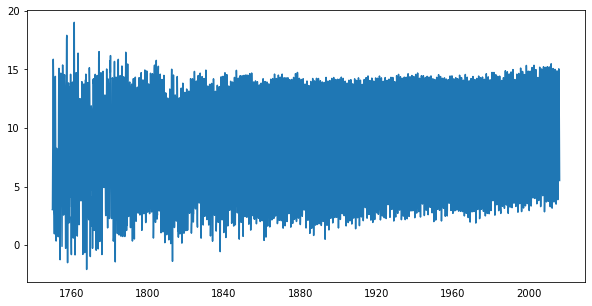

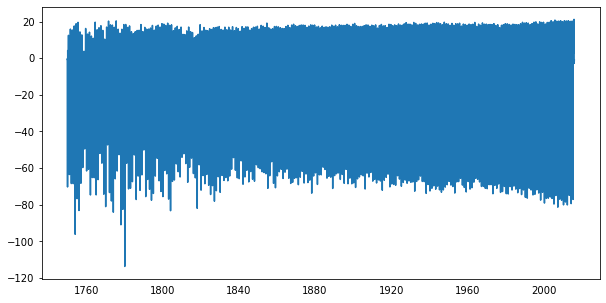

In [106]:
plt.rcParams.update({'figure.figsize': (10, 5)})

df_deseason = df_arima.copy()
plt.plot(df_deseason.index, df_deseason.LandAverageTemperature)
plt.show()

from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df_deseason['LandAverageTemperature'], model='additive', extrapolate_trend='freq')
deseasonalized = df_deseason.LandAverageTemperature.values / result_mul.seasonal

plt.plot(df_deseason.index, deseasonalized)
plt.show()

In [ ]:
# si procede tuttavia supponendo che i dati siano stazionari

## Divisione in train e test

In [108]:
# selezionare data di split

df_train = df_arima[df_arima.index < '2005-02-01'].copy()['LandAverageTemperature']

df_test = df_arima[df_arima.index >= '2005-02-01'].copy()['LandAverageTemperature']

# check sample size
print('Train: ', df_train.size)
print('Test: ', df_test.size)

Train:  3061
Test:  131


## Implementazione modello

In [109]:
smodel = pm.auto_arima(df_arima, start_p=1, start_q=1,
                       test='adf',
                       max_p=3, max_q=3, m=12,
                       start_P=0, seasonal=True,
                       d=None, D=1, trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=6.33 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=9612.931, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=8397.982, Time=1.44 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.71 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=9611.011, Time=0.13 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=9230.828, Time=0.36 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=8150.327, Time=3.62 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=13.33 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.63 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=8568.081, Time=2.86 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=8145.469, Time=4.14 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=8394.395, Time=1.77 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=17.09 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=9.72 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=8144

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 3192
Model:             SARIMAX(3, 0, 2)x(2, 1, [], 12)   Log Likelihood               -4054.682
Date:                             Sat, 18 Jun 2022   AIC                           8125.363
Time:                                     18:06:11   BIC                           8173.880
Sample:                                          0   HQIC                          8142.763
                                            - 3192                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.059     22.117      0.000       1.196       1.428
ar.L2         -0.9475      0.079    -11.987      0.000      -1.102      -0.793
ar.L3          0.1620      0.027      5.922      0.000       0.108       0.216
ma.L1         -0.9791      0.056    -17.425      0.000      -1.089      -0.869
ma.L2          0.6793      0.056     12.029      0.000       0.569       0.790
ar.S.L12      -0.5969      0.011    -56.747      0.000      -0.618      -0.576
ar.S.L24      -0.2727      0.009    -28.970      0.000      -0.291      -0.254
sigma2         0.7487      0.009     83.298      0.000       0.731       0.766
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6547.04
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Analisi dei residui modello selezionato

In [115]:
# modello migliore
# ARIMA(order=(3, 0, 2), scoring_args={}, seasonal_order=(2, 1, 0, 12),
#       suppress_warnings=True, with_intercept=False

from statsmodels.tsa.arima.model import ARIMA
mod4 = ARIMA(df_train,
             order=(3, 0, 2),
             seasonal_order=(2, 1, 0, 12))
mod4 = mod4.fit()

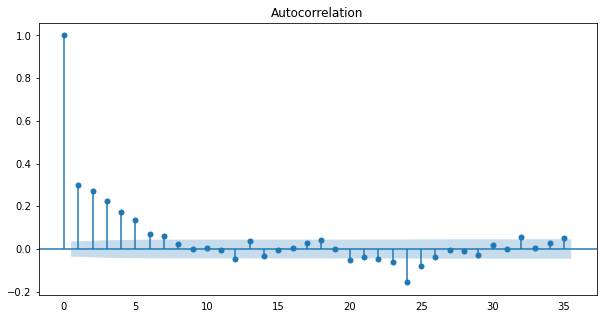

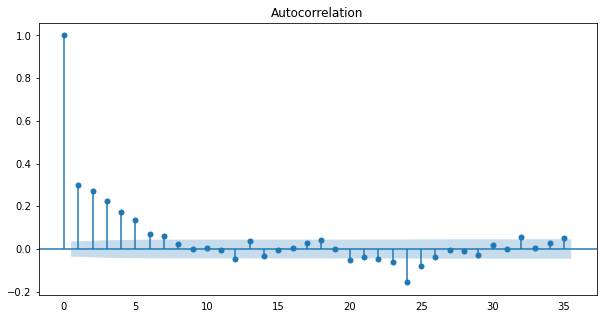

In [116]:
# analisi acf e pacf dei redsidui del modello migliore
plot_acf(mod4.resid)

## Previsioni sul test set

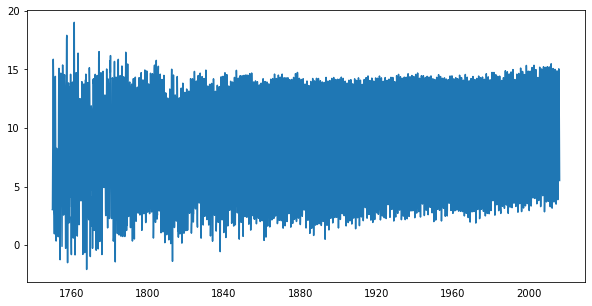

In [117]:
plt.plot(df_arima)

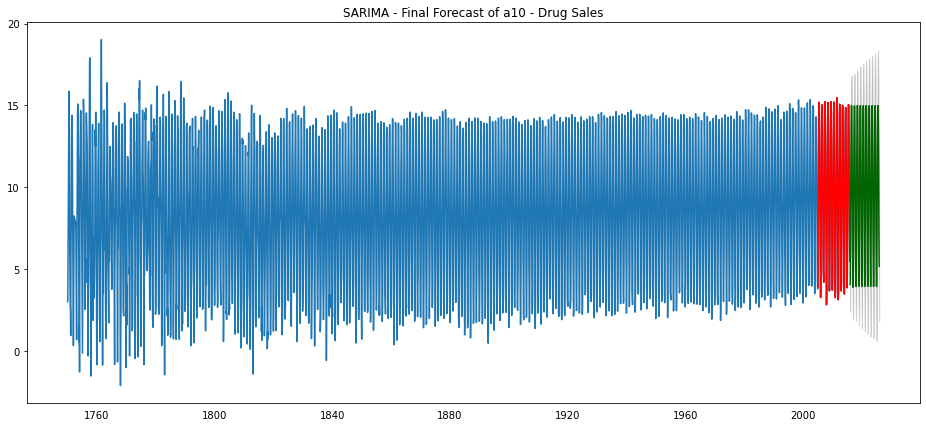

In [118]:
# Forecast su date nuove
n_periods = 120  # prossimi 10 anni = 120 mesi = 120 obs
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_arima.index[-1], periods=n_periods, freq='M')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(16, 7))

plt.plot(df_arima)
plt.plot(df_test, color='red')

plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

## Valutazione performance sul test set

## Previsioni

# Previsioni con Prophet

In [ ]:
# non è necessario rendere stazionaria la serie

In [100]:
!pip install pystan==2.19.1.1

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Running setup.py clean for pystan
Failed to build pystan
    Running setup.py install for pystan: started
    Running setup.py install for pystan: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'D:\Anaconda\envs\env_fisica\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\loren\\AppData\\Local\\Temp\\pip-install-0goupwfd\\pystan_e19852362ad34fa3b30468c09fddffe4\\setup.py'"'"'; __file__='"'"'C:\\Users\\loren\\AppData\\Local\\Temp\\pip-install-0goupwfd\\pystan_e19852362ad34fa3b30468c09fddffe4\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\loren\AppData\Local\Temp\pip-wheel-_bd9f3yw'
       cwd: C:\Users\loren\AppData\Local\Temp\pip-install-0goupwfd\pystan_e19852362ad34fa3b30468c09fddffe4\
  Complete output (17845 lines):
  Compiling pystan/_api.pyx because it depends on D:\Anaconda\envs\env_fisica\lib\site-packages\Cython\Includes

In [97]:
!pip install prophet

  Using cached prophet-1.0.1.tar.gz (65 kB)
  Using cached cmdstanpy-0.9.68-py3-none-any.whl (49 kB)
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.11-py3-none-any.whl
  Using cached korean_lunar_calendar-0.2.1-py3-none-any.whl (8.0 kB)
  Using cached ephem-4.1.3-cp39-cp39-win_amd64.whl (1.4 MB)
  Running setup.py clean for prophet
  Running setup.py clean for pystan
Failed to build prophet pystan
    Running setup.py install for pystan: started
    Running setup.py install for pystan: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'D:\Anaconda\envs\env_fisica\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\loren\\AppData\\Local\\Temp\\pip-install-fphcojus\\prophet_53fa51b1a31c4e3794a10057ede10039\\setup.py'"'"'; __file__='"'"'C:\\Users\\loren\\AppData\\Local\\Temp\\pip-install-fphcojus\\prophet_53fa51b1a31c4e3794a10057ede10039\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\loren\AppData\Local\Temp\pip-wheel-j_dh_64b'
       cwd: C:\Users\loren\AppData\Local\Temp\pip-install-fphcojus\prophet_53fa51b1a31c4e3794a10057ede10039\
  Complete output (44 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [121]:
m = Prophet()